# Function tutorial

We're going to start off by working with a slightly complicated formula and walk through how we put it together and eventually turn it into a Python function. Then (if there is enough time), we will walk you through how to put together a fairly complicated formula.

## Damped harmonic oscilator

Let's look at a classic physics example: a damped harmonic oscilator (see https://en.wikipedia.org/wiki/Damping and http://labman.phys.utk.edu/phys221core/modules/m11/damped_and_driven_oscillations.html for more information if desired). The motion of such an object has the following form: 

$y(t) = A e^{-\lambda t} \cos (\omega t - \phi) $ 

I stole some of the definitions from the wikipedia article, but it's good to establish what each variable and constant is before diving into the problem. Let's consider a mass $m$ on spring with some force constant $k$. We have: \
\
$y(t)$ is the instantaneous amplitude at time t; \
$A$ is the initial amplitude of the envelope; \
$\lambda$ is the decay rate, in the reciprocal of the time units of the independent variable t, also defined as $\lambda = b/ 2m$; \
$b$ is the damping term ; \
$\phi$ is the phase angle at t = 0; \
$\omega$ is the angular frequency, also defined as $\omega = \sqrt{\frac{k}{m} - (\frac{b}{2m})^2 }$; 


### Building our equation

So we want to model this formula in Python. We first will import libraries that we think are important to use. These are going to be `numpy` for scientific computing and `matplotlib` for plotting. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt 

Looking at our formula, we have a few constants we are working with. Let's set some constants to start with a fiducial (standard) example. For now, let's comment next to the value what they are. 

In [2]:
A = 1. # envelope amplitude 
phi = 0. # phase angle

k = 100. # force constant
m = 1. # mass 
b = 1. # damping strength 

A quick Python tip: if you initialize something with a value with a decimal after it, it is initialized as a float instead of an integer. 

In [3]:
type(1), type(1.)

(int, float)

We see that we have a couple of items that are dependent on other constants, specifically $\lambda$ and $\omega$. We can set these pretty easily right now since they're only dependent on constants. 

In [4]:
lam = b / (2 * m) # decay rate 
omega = np.sqrt(k / m - (b / (2 * m))**2 ) # angular frequency 

We know that the only input variable that changes is our time, $t$. So we can initialize this as an array we will use to evaluate our function. We want to set a start point (0), an end point (10), and some step size, `dt` to walk over. Let's use something fairly small like `dt = 0.001`.

In [5]:
dt = 0.001 # time steps 
t = np.arange(0, 10 + dt, dt) # time array we are evaluating over

we can break this problem up into two parts - the damping component and the wave component. Recall that the damping component is: 

$A e^{-\lambda t}$

We can set this a few ways. First let's fill in an empty array with a for loop. We also need something for modeling the exponent. From consulting numpy's documentation, we know that we can use `np.exp` to model $e^x$. What you pass in to that function is what you want to raise $e$ to. 

In [6]:
damping = np.zeros(len(t)) # damping part of equation 

for i in range(len(t)):
    damping[i] = A * np.exp(-lam * t[i])

Text(0, 0.5, 'position')

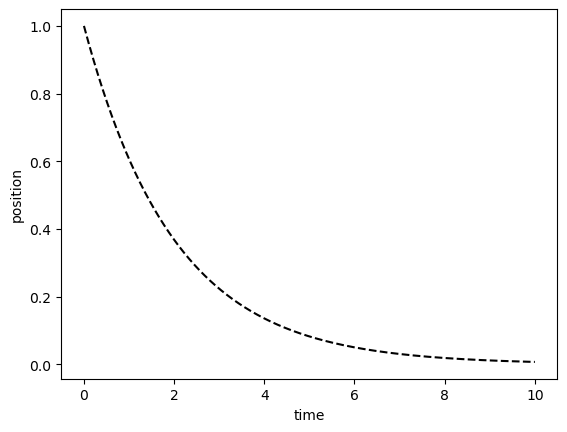

In [7]:
plt.plot(t, damping, c='black', ls='--')

plt.xlabel('time')
plt.ylabel('position')

A trick that you can use with Python is that if you pass an array into a function, Python will then evaluate the function for the entire array 'at the same time' (with some fancy under the hood magic). So instead of using a for loop, we can just pass in the `t` array.

In [8]:
damping = A * np.exp(-lam * t) 

We can also similarily model our wave component of the equation, which is simply: 

$\cos(\omega t)$

Again looking at the numpy documentation, we see we can use `np.cos` which takes in an angle (in radians) as input. 

In [9]:
wave = np.cos(omega * t - phi) # wave part of equation 

Text(0, 0.5, 'position')

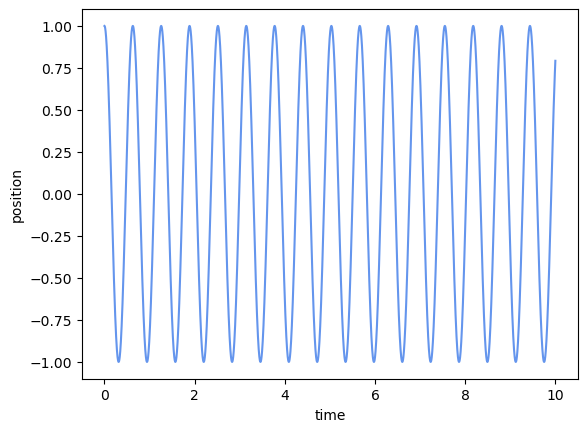

In [10]:
plt.plot(t, wave, c='cornflowerblue')

plt.xlabel('time')
plt.ylabel('position')

Now let's put together our damping and wave components by multiplying them together... 

Text(0, 0.5, 'position')

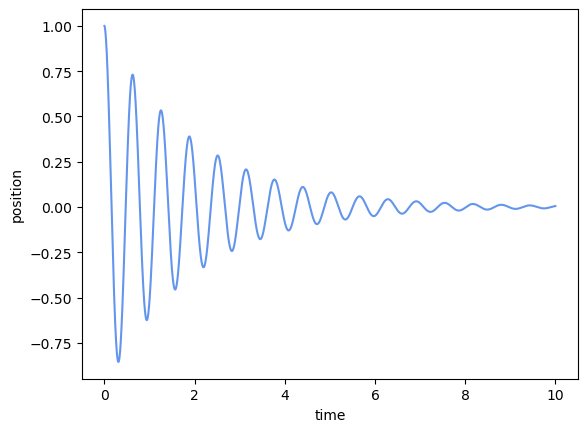

In [11]:
y_t = damping * wave

plt.plot(t, y_t, c='cornflowerblue')

plt.xlabel('time')
plt.ylabel('position')

In case we want to see what is happening physically, let's plot our equation components individually and then altogether... 

Text(0, 0.5, 'position')

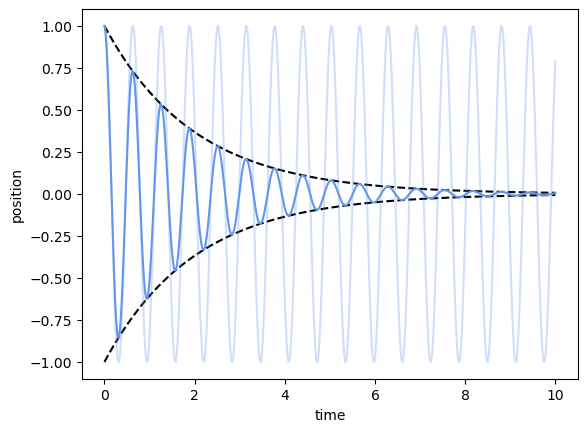

In [12]:
plt.plot(t, A * np.exp(-lam * t), c='black', ls='--')
plt.plot(t, -A * np.exp(-lam * t), c='black', ls='--')
plt.plot(t, A * np.cos(omega * t), c='cornflowerblue', alpha=0.3)

plt.plot(t, y_t,  c='cornflowerblue')

plt.xlabel('time')
plt.ylabel('position')

### Defining and creating functions

Now that we have the components of our equation, we can now start to play around with it by varying some of our constants (parameters). Let's start by modifying the envelope amplitude, $A$, and testing a few different values.

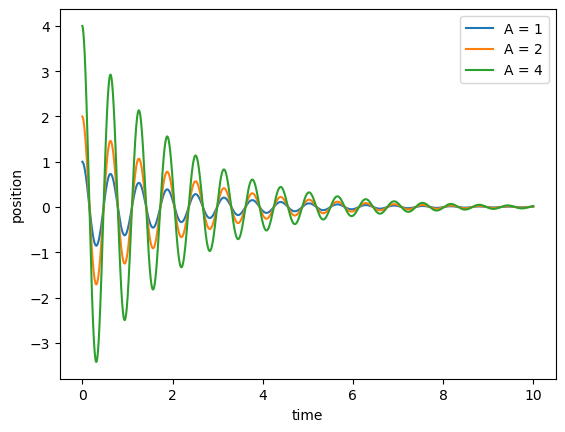

In [13]:
plt.plot(t, 1 * np.exp(-lam * t) * np.cos(omega * t - phi), label='A = 1')
plt.plot(t, 2 * np.exp(-lam * t) * np.cos(omega * t - phi), label='A = 2')
plt.plot(t, 4 * np.exp(-lam * t) * np.cos(omega * t - phi), label='A = 4')

plt.xlabel('time')
plt.ylabel('position')
plt.legend()

While we can keep changing the value manually in front of our giant equation, it's pretty clunky. So we should put everything into a function that makes it easier to work with pieces of code in isolation. 

To start, let's take everything that we defined from the very beginning and just put it in a function block as is. We will define this function (called `oscillator`) and have it that it only takes a single input (argument) `t` which is our time variable. 

In [14]:
def oscillator(t): 
    A = 1 # envelope amplitude 
    phi = 0 # phase angle
    
    k = 100 # force constant
    m = 1 # mass of obj
    b = 1 # damping strength

    lam = b / (2 * m) 
    omega = np.sqrt(k / m - (b / (2 * m))**2 )

    y_t = A * np.exp(-lam * t) * np.cos(omega * t) 

    return y_t

We can then call the function by passing in either a value for `t` or the whole array we previously defined. 

Text(0, 0.5, 'position')

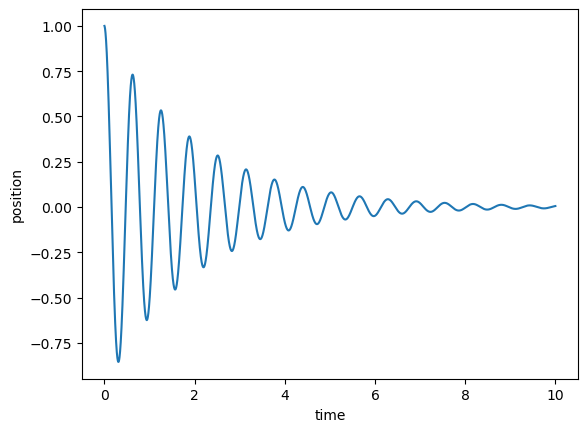

In [15]:
plt.plot(t , oscillator(t))

plt.xlabel('time')
plt.ylabel('position')

Let's now make the function block a little bit cleaner. We can do this using both arguements (args) and keyword arguments (kwargs). args are mandatory items you have to pass to the function to get it to run, whereas kwargs are optional items you can pass in if you want to change them from some default value. Let's take some of our constants and turn them into kwargs in our function.

In [16]:
def oscillator(t, A = 1, k=100, m=1, b=1, phi=0): 
    lam = b / (2 * m) # decay rate 
    omega = np.sqrt(k / m - (b / (2 * m))**2 ) # angular frequency 

    y_t = A * np.exp(-lam * t) * np.cos(omega * t) 

    return y_t 

We can now run our function using args and kwargs and it looks a lot cleaner and simpler to handle!

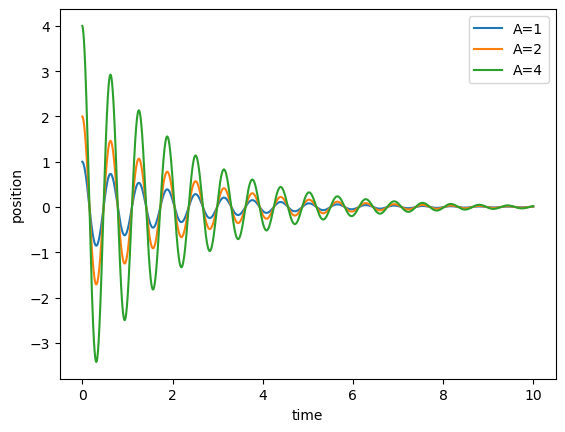

In [17]:
y_t = oscillator(t)

plt.plot(t, y_t, label='A=1')
plt.plot(t, oscillator(t, A=2), label='A=2')
plt.plot(t, oscillator(t, A=4), label='A=4')

plt.xlabel('time')
plt.ylabel('position')
plt.legend()

With that settled, we now should work on documenting our function. If we don't document it, there's a chance we will forget what our function does, or a chance that someone else trying to read and understand it does not get it. 

In [18]:
def oscillator(t, A = 1., k=100., m=1., b=1., phi=0.): 
    """Model the motion of a (damped) simple harmonic oscillator. 

    Aruguments: 
    t -- time to evaluate function at 
    
    Keyword arguments:
    A -- envelope amplitude (default 1.0)
    k -- force constant of the spring (default 100.0)
    m -- mass of the object on the spring (default 1.0)
    b -- damping strength (default 1.0)
    phi -- phase angle (default 1.0)
    """
    lam = b / (2 * m) 
    omega = np.sqrt(k / m - (b / (2 * m))**2 )

    y_t = A * np.exp(-lam * t) * np.cos(omega * t) 

    return y_t

If you've commented your function, you can use `func.__doc__` to return to you the docstring associated with the function you are writing.

In [19]:
print(oscillator.__doc__)

Model the motion of a (damped) simple harmonic oscillator. 

    Aruguments: 
    t -- time to evaluate function at 
    
    Keyword arguments:
    A -- envelope amplitude (default 1.0)
    k -- force constant of the spring (default 100.0)
    m -- mass of the object on the spring (default 1.0)
    b -- damping strength (default 1.0)
    phi -- phase angle (default 1.0)
    


We can also make our $\lambda$ and $\omega$ calculations from above into functions. Let's make that an exercise to first define a function for the two, and then call the two functions within our oscillator function. 

In [20]:
def lam_func(b, m): 
    """Model the decay rate of a (damped) simple harmonic oscillator.

    Aruguments: 
    m -- mass of the object on the spring 
    b -- damping strength
    """
    return b / (2 * m) 

def omega_func(k, b, m):
    """Model angular frequency of a (damped) simple harmonic oscillator. 

    Aruguments: 
    k -- force constant of the spring
    m -- mass of the object on the spring 
    b -- damping strength
    """
    
    return np.sqrt(k / m - (b / (2 * m))**2 )

def oscillator(t, A = 1, k=100, m=1, b=1, phi=0): 
    """Model the motion of a (damped) simple harmonic oscillator. 

    Aruguments: 
    t -- time to evaluate function at 
    
    Keyword arguments:
    A -- envelope amplitude (default 1.0)
    k -- force constant of the spring (default 100.0)
    m -- mass of the object on the spring (default 1.0)
    b -- damping strength (default 1.0)
    phi -- phase angle (default 1.0)
    """
    
    return A * np.exp(-lam_func(b, m) * t) * np.cos(omega_func(k, b, m) * t) 

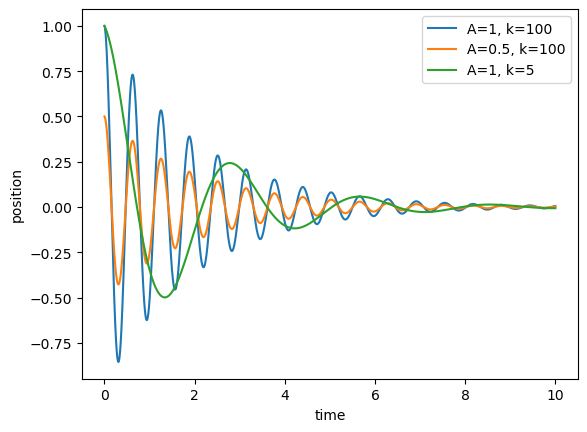

In [21]:
plt.plot(t, oscillator(t), label='A=1, k=100')
plt.plot(t, oscillator(t, A=0.5), label='A=0.5, k=100')
plt.plot(t, oscillator(t, k=5), label='A=1, k=5')

plt.xlabel('time')
plt.ylabel('position')
plt.legend()

For a last bit of physics, we see that we can recover our wave by setting b = 0, returning to the simple harmonic oscilator case. Doing tests like this is also a great way to see if your function works at edge cases! 

/tmp/ipykernel_321405/3130478011.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


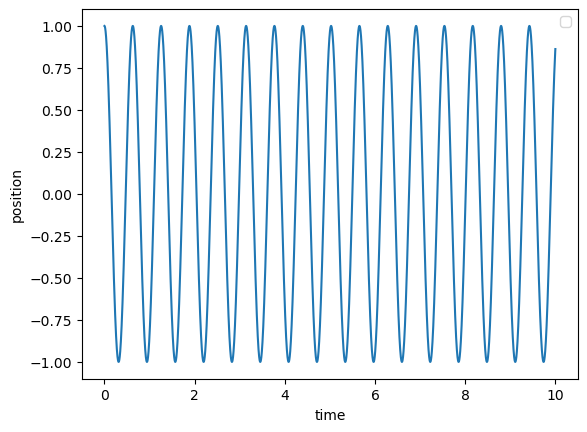

In [22]:
plt.plot(t, oscillator(t, b = 0))

plt.xlabel('time')
plt.ylabel('position')
plt.legend()

## Total scattering cross section with Klein–Nishina formula

Let's try and look at a really complicated (long) equation. One such example is the Klein-Nishina formula to find a cross section area, taken from this wikipedia page (https://en.wikipedia.org/wiki/Klein%E2%80%93Nishina_formula):

$\sigma = 2 \pi r_{\rm e}^2 \left[ \frac{1 + \epsilon}{\epsilon^3} \left(\frac{2\epsilon(1 + \epsilon)}{1 + 2\epsilon} - \log{1 + 2\epsilon} \right) + \frac{\log(1 + 2\epsilon)}{2\epsilon}  - \frac{1 + 3\epsilon}{(1 + 2\epsilon)^2} \right]$

where: \
$\sigma$ is the cross section area (units of ${\rm cm}^2$) ;\
$r_{\rm e}$ is the electron radius ($2.818 \times 10^{-13} \ {\rm cm}^2$) ; \
$\epsilon$ is the ratio between the energy of an incidental photon ($E_{\rm \gamma}$) and an electron ($E_{\rm e} = m_{\rm e}c^2$), expressed as $\epsilon = E_{\rm \gamma} / E_{\rm e}$ (dimensionless)

Yeah that's pretty gross looking.

Note that in the low energy limit ($E_{\rm \gamma} << E_{\rm e}$) the cross section area is just the Thomson cross section: 

$\sigma \approx \frac{8}{3} \pi r_{\rm e}^2 $ 

How would I write this equation out and then make it to a function?

Since I know we will be doing some testing, I'm going to initalize a dummy value for epsilon for this, say $\epsilon = 10^{-3}$ to test in the low energy limit. 

In [35]:
eps = 1.e-3

Also declaring our constant that we will be using: 

In [36]:
r_e = 2.818e-13 # cm

Coding this up is a behemoth so let's break this up into parts. Let's tackle the stuff inside the brackets first. There's three operations inside the brackets, so we can assign something to each component there. We'll call this the first term `p1`, the second `p2`, and the third `p3`. So our equation looks a little more like this now:  

$\sigma = 2 \pi r_{\rm e}^2 \left[ p_1 + p_2 - p_3 \right]$

Which is a lot simpler to work with as a final step. 

So, let's start with what we assigned to `p1`: 

$p_1 = \frac{1 + \epsilon}{\epsilon^3} \left(\frac{2\epsilon(1 + \epsilon)}{1 + 2\epsilon} - \log{1 + 2\epsilon} \right)$

This is still kinda complicated but doable. My strategy would be to first handle everything inside the parentheses, and then later multiply by the outside term.

In [37]:
p1 = 2. * eps * (1. + eps) / (1. + 2. * eps) - np.log(1. + 2. * eps) 
p1 = (1. + eps) / eps**3 * p1

Next is the second term in the bracket, which we will assign to `p2`: 

$p_2 = \frac{\log(1 + 2\epsilon)}{2\epsilon}$

In [38]:
p2 = np.log(1. + 2. * eps) / (2. * eps) 

Last is the third term in the bracket, which we will assign to `p3`:

$p_3 = \frac{1 + 3\epsilon}{(1 + 2\epsilon)^2} $ 

In [39]:
p3 = (1. + 3. * eps) / (1. + 2. * eps)**2

We can now all put this together pretty simply now: 

In [40]:
sigma_cross = 2. * np.pi * r_e**2 * (p1 + p2 - p3)

We can do a test to make sure we recover the Thomson cross section area in the low energy limit.

In [44]:
sigma_t = (8/3) * np.pi * r_e**2 # thomson cross sec., cm^-2 

print(sigma_t, sigma_cross)

6.652740485238826e-25 6.639469500316221e-25


Seems like we are pretty close! Now lets bake everything into a function: 

In [29]:
def sigma_kn(eps):
    """Model the decay rate of a (damped) simple harmonic oscillator.

    Aruguments: 
    eps -- ratio between incident photon and election energies (dimensionless) 
    """

    # first term in brackets
    p1 = 2. * eps * (1. + eps) / (1. + 2. * eps) - np.log(1. + 2. * eps) 
    p1 = (1. + eps) / eps**3 * (p1)

    # second term in brackets 
    p2 = np.log(1. + 2. * eps) / (2. * eps) 

    # third term in brackets 
    p3 = (1. + 3. * eps) / (1. + 2. * eps)**2

    sigma_cross = 2. * np.pi * r_e**2 * (p1 + p2 - p3)

    return sigma_cross

And then we can do some tests via plotting

In [42]:
eps_arr = np.logspace(-4, 1, 10000) # dimensionless 

sigma_kn_arr = sigma_kn(eps_arr) # KN cross sec., cm^-2

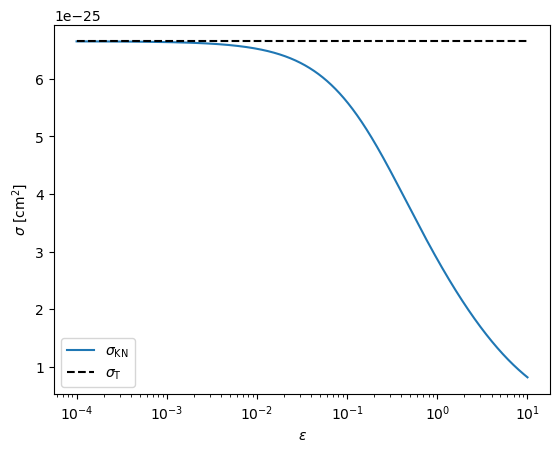

In [34]:
plt.plot(eps_arr, sigma_kn(eps_arr), label=r'$\sigma_{\rm KN}$')

plt.hlines(xmin=1e-4, xmax=10, y=sigma_t, color='black', ls='--', label=r'$\sigma_{\rm T}$')
plt.xscale('log')

plt.ylabel(r'$\sigma \ [{\rm cm}^2]$')
plt.xlabel(r'$\epsilon$')
plt.legend(loc='lower left') 